In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
plt.style.use('fivethirtyeight')
datafile='C:\\Users\\12700\\Desktop\\网课\\人工网络神经\\逻辑回归\\S(1).csv'
f=open(datafile)
data=pd.read_csv(f,header=0,encoding="gbk",names=["age","salary","purchased"],
               skiprows=1)
data.head()


,age,salary,purchased
0,36,20000,0
1,27,43000,0
2,28,57000,0
3,20,76000,0
4,28,58000,0


C:\Users\12700\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


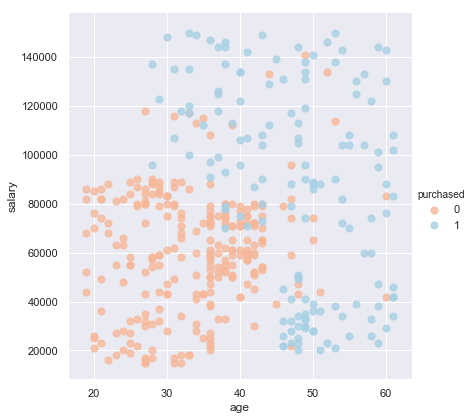

In [48]:
sns.set(color_codes=False,context="notebook",style="darkgrid",palette=sns.color_palette("RdBu",2))
sns.lmplot('age','salary',hue='purchased',data=data,
          size=6,
          fit_reg=False,
          scatter_kws={"s":50})
plt.show()

In [49]:
#归一化
mm = MinMaxScaler()
data= mm.fit_transform(data)
print(data)
data=pd.DataFrame(data)

[[0.4047619  0.03703704 0.        ]
 [0.19047619 0.20740741 0.        ]
 [0.21428571 0.31111111 0.        ]
 ...
 [0.76190476 0.03703704 1.        ]
 [0.42857143 0.13333333 0.        ]
 [0.73809524 0.15555556 1.        ]]


In [15]:
def get_X(df):
    ones=pd.DataFrame({'ones':np.ones(len(df))})
    data=pd.concat([ones,df],axis=1)#加一列1
    return data.iloc[:,:-1].values#返回前len-1列为X

def get_y(df):
    return np.array(df.iloc[:,-1])#返回最后一列为y

In [16]:
X=get_X(data)
y=get_y(data)
theta=np.zeros(3)

def sigmoid(z):
    return 1/(1+np.exp(-z))
def cost(theta,X,y):
    return np.mean(-y * np.log(sigmoid(np.dot(X,theta))) - (1 - y) * np.log(1-sigmoid(np.dot(X,theta))))


cost(theta,X,y)

0.6931471805599453

In [17]:
def gradient(theta,X,y):
    return(1/len(X))*np.dot(X.T,sigmoid(np.dot(X,theta)-y))
gradient(theta,X,y)

array([0.41718953, 0.17856559, 0.15950155])

In [18]:
import scipy.optimize as opt
res=opt.minimize(fun=cost,x0=theta,args=(X,y),method='Newton-CG',jac=gradient)
print(res)

     fun: 0.6712372453977753
     jac: array([0.33667011, 0.14096868, 0.12635682])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 45
    nhev: 0
     nit: 1
    njev: 39
  status: 2
 success: False
       x: array([-0.26996081, -0.11554871, -0.10321248])


In [19]:
coef=-(res.x/res.x[2])
print(coef)


[-2.61558294 -1.11952261 -1.        ]


In [67]:
data=round(data*100)

In [66]:
data.columns=['age','salary','purchased']
#print(data)


C:\Users\12700\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


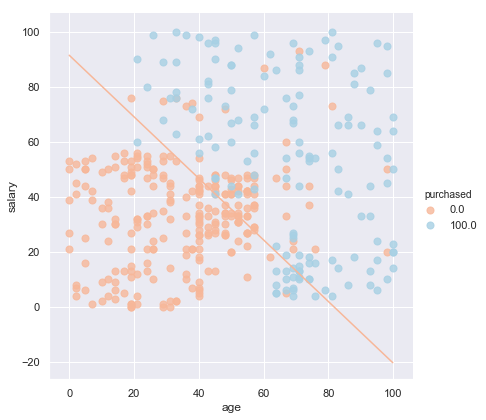

In [64]:
x=np.arange(100,step=0.1)
y=coef[0]*(-35)+coef[1]*x
sns.set(color_codes=False,context="notebook",style="darkgrid",palette=sns.color_palette("RdBu",2))
sns.lmplot('age','salary',hue='purchased',data=data,
          size=6,
          fit_reg=False,
          scatter_kws={"s":50})
plt.plot(x,y)
plt.show()
